# シンクホーンアルゴリズム（アルゴリズム 3.2）

In [ ]:
! pip install POT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot
import matplotlib

In [2]:
# データの生成
np.random.seed(0)
n, m = 8, 8
C = np.random.rand(n, m)
a = np.random.rand(n)
a /= a.sum()
b = np.random.rand(m)
b /= b.sum()

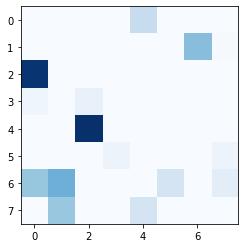

In [3]:
P = ot.emd(a, b, C)
plt.imshow(P, cmap=plt.cm.Blues)

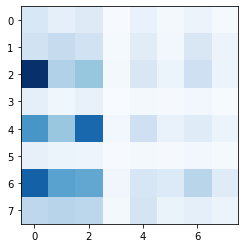

<Figure size 432x288 with 0 Axes>

In [4]:
# シンクホーンアルゴリズム（アルゴリズム 3.2）

eps = 1
K = np.exp(- C / eps) # ギブスカーネルの計算
v = np.ones(m)
for k in range(100):
    u = a / (K @ v)
    v = b / (K.T @ u)
P = u.reshape(n, 1) * K * v.reshape(1, m) # 主解
plt.imshow(P, cmap=plt.cm.Blues, vmin=0) # 解の可視化
plt.show() # シンクホーンアルゴリズムは「ぼやける」
plt.clf()

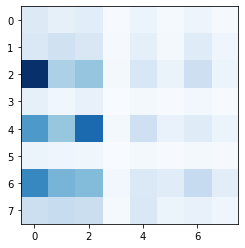

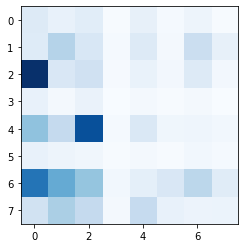

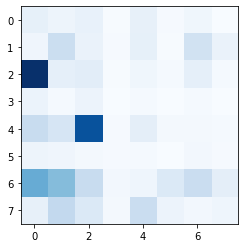

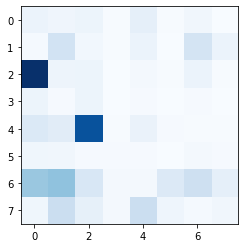

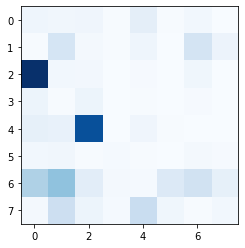

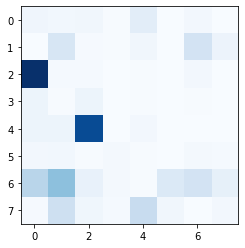

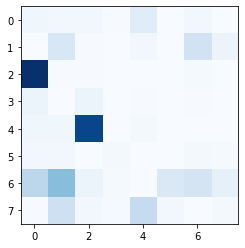

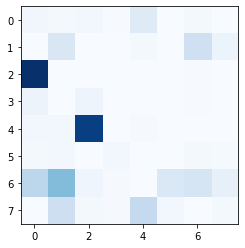

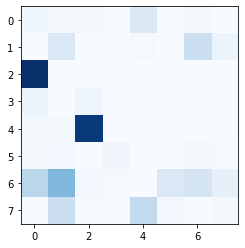

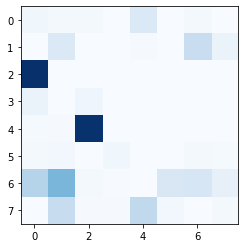

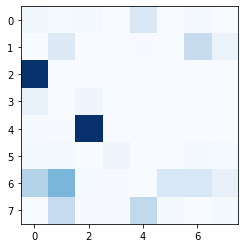

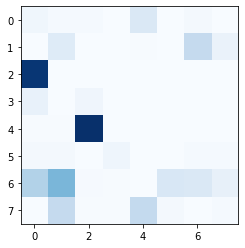

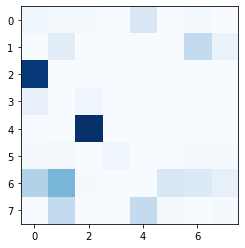

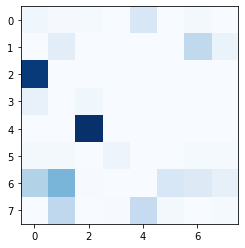

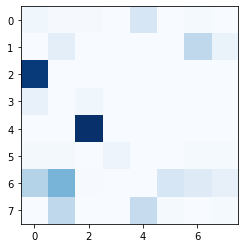

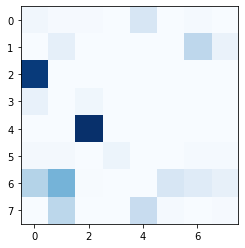

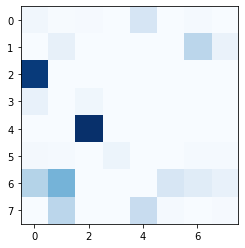

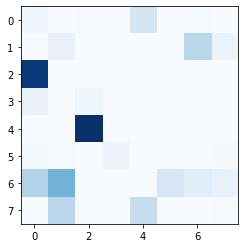

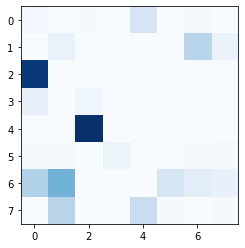

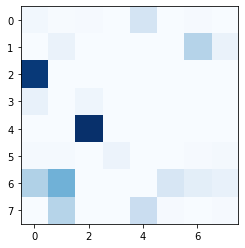

<Figure size 432x288 with 0 Axes>

In [5]:
# 近接点アルゴリズムによる正則化なしの最適輸送コストの計算（アルゴリズム 3.7）

eps = 1
K = np.exp(- C / eps) # ギブスカーネルの計算
P = np.ones((n, m))
v = np.ones(m)
for k in range(20):
    L = K * P
    u = a / (L @ v)
    v = b / (L.T @ u)
    P = u.reshape(n, 1) * L * v.reshape(1, m) # 主解
    plt.imshow(P, cmap=plt.cm.Blues) # 解の可視化
    plt.show() # 近接点アルゴリズムを用いると厳密解に近づく
    plt.clf()